# Explore here

In [2]:
import os  # Para operaciones de sistema de archivos
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # Para procesamiento de imágenes

2024-04-18 19:18:54.612689: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 19:18:55.788623: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 19:18:56.563635: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 19:19:00.496979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Cargar el conjunto de datos CSV que contiene la información de las imágenes
data = '../data/raw/train'

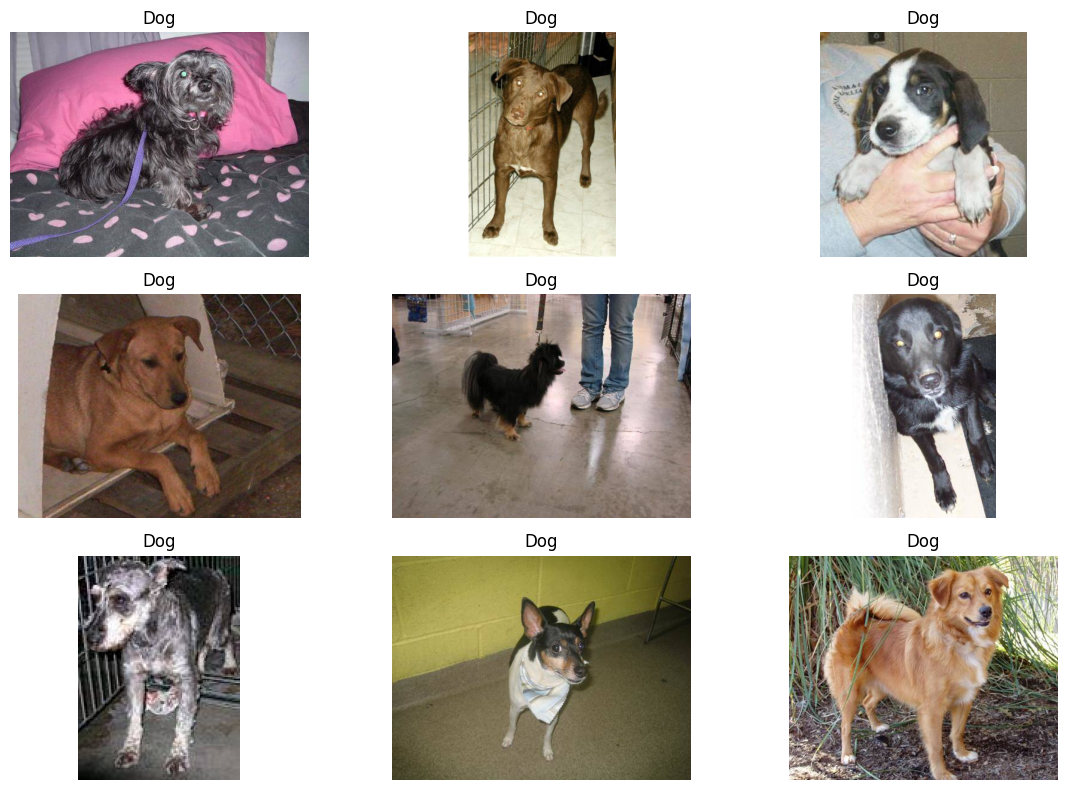

In [4]:

archivos_imagen = os.listdir(data)  # lista de todos los nombres de archivos de imagen de perro en la carpeta especificada

archivos_imagen_dog = [f for f in archivos_imagen if 'dog' in f]  # Filtrar los nombres de los archivos para incluir solo los que contienen 'dog'

archivos_imagen_dog = sorted(archivos_imagen_dog)[:9]  # # Ordena los nombres de archivos para obtener las primeras 9 imágenes de perros

dog_images = []   # lista vacía llamada dog_images para almacenar las imágenes de perro 

for filename in archivos_imagen_dog:
    # ruta completa del archivo de imagen:
    img_path = os.path.join(data, filename)  # os.path.join() une la ruta de la carpeta de perros con el nombre de archivo de imagen
    img = image.load_img(img_path)  # mage.load_img() carga la imagen como un objeto PIL.Image.
    img_array = image.img_to_array(img)  # La imagen se convierte en un array NumPy, lo que permite su manipulación y procesamiento posterior
    img_array /= 255.0  # Se normalizan los valores de píxeles de la imagen dividiendo cada valor de píxel por 255.0 para ajustarlos al rango [0, 1].
    dog_images.append(img_array)


plt.figure(figsize=(12, 8))

# itera sobre las nueve imágenes en la lista dog_images en un bucle for:
for i in range(9):
    plt.subplot(3, 3, i + 1)  # plt.subplot() para definir la posición de la subtrama dentro de la figura general. En este caso, se utiliza una cuadrícula de 3x3, por lo que hay nueve subtramas en total.
    plt.imshow(dog_images[i])
    plt.title('Dog')
    plt.axis('off')  # Se desactivan los ejes utilizando plt.axis('off') para eliminar los números de los ejes x e y.

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

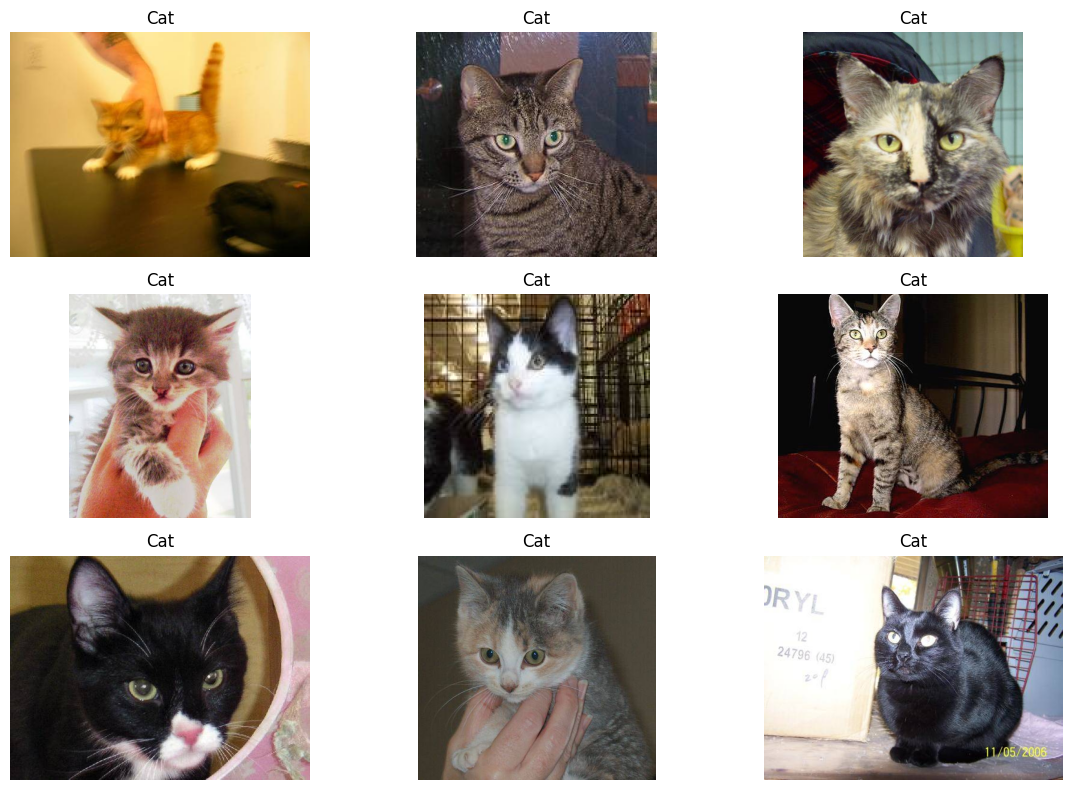

In [5]:

archivos_imagen_cat = [f for f in archivos_imagen if 'cat' in f]  # Filtrar los nombres de los archivos para incluir solo los que contienen 'dog'

archivos_imagen_cat = sorted(archivos_imagen_cat)[:9]  # # Ordena los nombres de archivos para obtener las primeras 9 imágenes de gatos

cat_images = []   # lista vacía llamada dog_images para almacenar las imágenes de gatos

for file_name in archivos_imagen_cat:
    # ruta completa del archivo de imagen:
    imag_path = os.path.join(data, file_name)  # os.path.join() une la ruta de la carpeta de gatos con el nombre de archivo de imagen
    imag = image.load_img(imag_path)  # mage.load_img() carga la imagen como un objeto PIL.Image.
    imag_array = image.img_to_array(imag)  # La imagen se convierte en un array NumPy, lo que permite su manipulación y procesamiento posterior
    imag_array /= 255.0  # Se normalizan los valores de píxeles de la imagen dividiendo cada valor de píxel por 255.0 para ajustarlos al rango [0, 1].
    cat_images.append(imag_array)


plt.figure(figsize=(12, 8))

# itera sobre las nueve imágenes en la lista cat_images en un bucle for:
for i in range(9):
    plt.subplot(3, 3, i + 1)  # plt.subplot() para definir la posición de la subtrama dentro de la figura general. En este caso, se utiliza una cuadrícula de 3x3, por lo que hay nueve subtramas en total.
    plt.imshow(cat_images[i])
    plt.title('Cat')
    plt.axis('off')  # Se desactivan los ejes utilizando plt.axis('off') para eliminar los números de los ejes x e y.

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [6]:

# Lista todos los archivos en la carpeta
files = os.listdir(data)

# Cuenta el número de archivos que tienen una extensión de imagen válida
num_images = sum(1 for file in files if file.endswith(('.jpg')))

print("Número total de imágenes:", num_images)

Número total de imágenes: 25000


In [7]:
import shutil

# Ruta del directorio principal que contiene todas las imágenes
directorio_principal = "/workspaces/Deep-learning--RN/data/interim/train"

# Crea los directorios 'dog' y 'cat' dentro del directorio principal
os.makedirs(os.path.join(directorio_principal, "dog"), exist_ok=True)
os.makedirs(os.path.join(directorio_principal, "cat"), exist_ok=True)

# Itera sobre todos los archivos en el directorio principal
for filename in os.listdir(directorio_principal):
    # Verifica si el archivo es una imagen de perro
    if "dog" in filename:
        # Mueve la imagen de perro al subdirectorio 'dog'
        shutil.move(os.path.join(directorio_principal, filename), os.path.join(directorio_principal, "dog"))
    # Verifica si el archivo es una imagen de gato
    elif "cat" in filename:
        # Mueve la imagen de gato al subdirectorio 'cat'
        shutil.move(os.path.join(directorio_principal, filename), os.path.join(directorio_principal, "cat"))

In [10]:
data_dir = '/workspaces/Deep-learning--RN/data/interim/train'

# Crea un objeto ImageDataGenerator:

datagen = ImageDataGenerator(rescale=1./255)

# Carga los datos de entrenamiento progresivamente:

batch_size = 32
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(200, 200),  # Redimensiona las imágenes a 200x200 píxeles
    batch_size=batch_size,
    class_mode='binary') # Modo de clasificación binaria

Found 25000 images belonging to 2 classes.
